In [453]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [454]:
df = pd.read_csv("flight-data.csv")
df.drop(columns = ["Unnamed: 0"], inplace = True)
df.head()

,lat,lon,alt,unix,bird,species,year,date_time,max_depth.m,colony2,coverage_ratio,is_dive,is_dive_1m,is_dive_2m,is_dive_4m,is_dive_5m,is_dive_0m
0,56.095451,-6.233089,-23.059999,1340627854,1,tCOGU,t2012,2012-06-25 13:37:34,-2.172046,1,0.5,False,False,False,False,False,False
1,56.095408,-6.233520,-2.983077,1340627954,1,tCOGU,t2012,2012-06-25 13:39:14,-1.152306,1,0.6,False,False,False,False,False,False
2,56.095437,-6.234275,3.470286,1340628054,1,tCOGU,t2012,2012-06-25 13:40:54,-2.172046,1,0.7,False,False,False,False,False,False
3,56.095635,-6.234815,1.902667,1340628154,1,tCOGU,t2012,2012-06-25 13:42:34,-2.172046,1,0.8,False,False,False,False,False,False
4,56.095821,-6.235293,2.824952,1340628254,1,tCOGU,t2012,2012-06-25 13:44:14,-2.172046,1,0.9,False,False,False,False,False,False


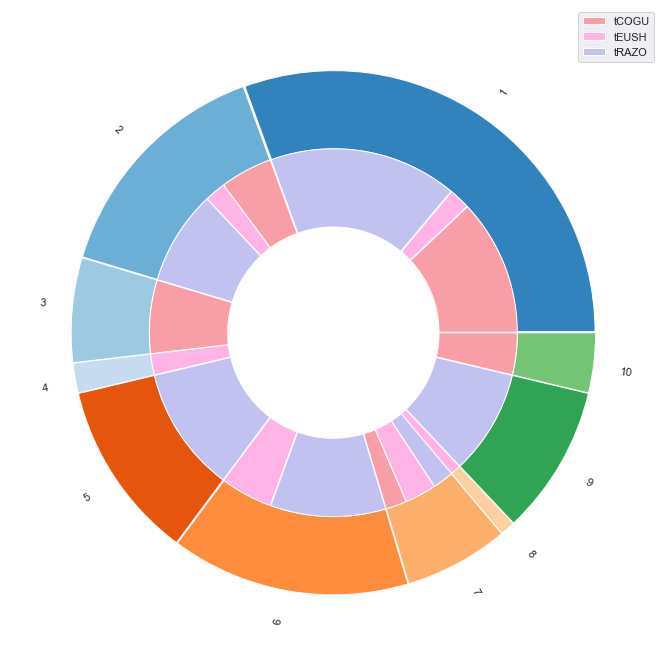

In [455]:
# Task: visualize number of colonies / species and distribution of each.

filtered = df[["bird", "species", "colony2"]]
outer = filtered.groupby(["colony2"])["bird"].nunique()
inner = filtered.groupby(["colony2", "species"])["bird"].nunique()

outer_labels = outer.index
inner_labels = inner.index.get_level_values(1)

fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot()

colormap = plt.cm.get_cmap("tab20c")
outer_colors = colormap(np.arange(10))
inner_colors = {"tRAZO" : "#c2c2f0",
                "tEUSH" : "#ffb3e6",
                "tCOGU" : "#f79ea6"}

outer_explode = [0.005] * len(outer_labels)
inner_explode = [0.005] * len(inner_labels)

size = 0.3

_ = ax.pie(outer.values.flatten(), radius = 1, labels = outer_labels,
           colors = outer_colors, explode = outer_explode,
           wedgeprops = dict(width = size, edgecolor = "w"), rotatelabels = True)

patches, _ = ax.pie(inner.values.flatten(), radius = 1 - size,
                    colors = [inner_colors[key] for key in inner_labels], explode = inner_explode,
                    wedgeprops = dict(width = size, edgecolor = "w"), rotatelabels = True)

_ = ax.legend(patches[0:3], inner_labels)

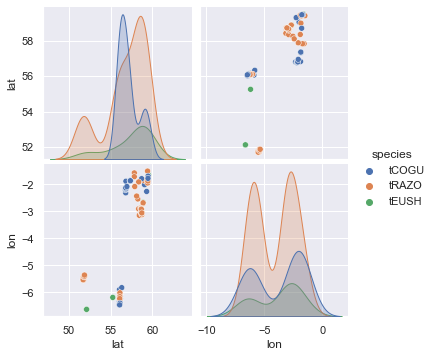

In [456]:
# Task: location distribution of birds based on species (pair plot).

bird_locations = df.groupby(["bird"])[["lat", "lon"]].mean()
bird_species = df.groupby(["bird"])["species"].unique().apply(lambda x : x[0])
bird_total = pd.concat([bird_locations, bird_species], axis = 1)

_ = sns.pairplot(bird_total, hue = "species")

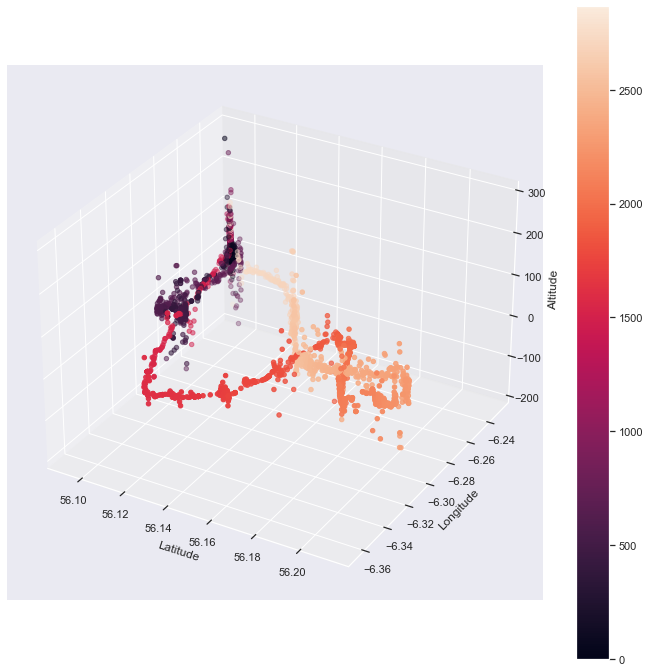

In [457]:
# Task: individual track of bird as a function of its altitude, latitude, and longitude.

bird_of_interest = 1

single_bird_df = df[df["bird"] == bird_of_interest]
single_bird_df.reset_index(inplace = True)

fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(projection = "3d")

result = ax.scatter(single_bird_df["lat"], single_bird_df["lon"], 
                    single_bird_df["alt"], c = single_bird_df.index)
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_zlabel("Altitude")

fig.colorbar(result)
plt.show()